In [ ]:
!pip install geopandas 
!pip install contextily

     |████████████████████████████████| 1.0 MB 8.5 MB/s 
     |████████████████████████████████| 15.4 MB 47.4 MB/s 
     |████████████████████████████████| 6.3 MB 32.4 MB/s 
     |████████████████████████████████| 19.3 MB 363 kB/s 


In [ ]:
%matplotlib inline
import pandas as pd
import geopandas
import contextily
import geopandas as gpd
import xyzservices.providers as xyz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
parchi_reg = geopandas.read_file("/content/drive/MyDrive/Parchi_regionali_e_nazionali_polygon")
parchi_reg

FID  ...                                           geometry
0     5  ...  POLYGON ((587577.037 5107497.548, 587615.036 5...
1     6  ...  POLYGON ((586196.195 5100871.221, 586351.566 5...
2     7  ...  POLYGON ((486537.216 5078441.081, 486530.341 5...
3     8  ...  POLYGON ((617860.123 5053114.432, 617863.431 5...
4     1  ...  POLYGON ((584084.298 5161019.100, 583763.056 5...
5     2  ...  POLYGON ((611429.112 5154022.734, 612080.475 5...
6     3  ...  POLYGON ((584084.298 5161019.100, 584083.048 5...
7     4  ...  POLYGON ((617719.939 5125721.072, 617744.313 5...
8     9  ...  POLYGON ((533258.682 5067541.607, 533248.433 5...
9    15  ...  POLYGON ((476666.268 5067282.167, 476899.067 5...
10   11  ...  POLYGON ((503128.548 5073530.075, 503147.548 5...
11   10  ...  POLYGON ((530035.026 5077348.997, 530099.399 5...
12   20  ...  POLYGON ((566862.701 5044980.915, 566850.701 5...
13   16  ...  POLYGON ((551172.408 5063194.271, 551171.818 5...
14   17  ...  POLYGON ((530460.139 5059979.758, 530448.139 5...
15   12  ...  POLYGON ((519023.300 5071249.811, 519020.695 5...
16   13  ...  POLYGON ((508880.762 5069982.391, 508899.778 5...
17   14  ...  POLYGON ((492571.508 5069463.220, 492567.133 5...
18   19  ...  POLYGON ((507798.216 5051185.214, 507708.842 5...
19   18  ...  POLYGON ((557596.061 5048270.880, 557609.061 5...
20   21  ...  POLYGON ((516502.662 5041742.040, 516403.321 5...
21   22  ...  POLYGON ((533691.079 5042919.602, 533758.703 5...
22   23  ...  POLYGON ((540167.544 5038793.618, 540195.043 5...
23   24  ...  POLYGON ((632059.361 5023580.221, 631992.362 5...
24   25  ...  POLYGON ((507743.475 5029863.193, 507763.882 5...
25   26  ...  POLYGON ((597132.825 5006159.060, 597136.825 5...

[26 rows x 11 columns]

In [ ]:
provincie = geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/ProvCM01012021_g")
provincie

COD_RIP  ...                                           geometry
0          1  ...  POLYGON ((411015.006 5049970.983, 411266.039 5...
1          1  ...  POLYGON ((438328.612 5087208.215, 439028.888 5...
2          1  ...  POLYGON ((460929.542 5076320.298, 461165.259 5...
3          1  ...  MULTIPOLYGON (((378673.492 4958865.159, 378928...
4          1  ...  POLYGON ((425041.329 4997628.309, 424948.989 4...
..       ...  ...                                                ...
102        1  ...  POLYGON ((457749.464 5145501.795, 458662.395 5...
103        1  ...  POLYGON ((519754.706 5065242.380, 520199.702 5...
104        3  ...  POLYGON ((884760.019 4804406.440, 885511.011 4...
105        4  ...  POLYGON ((1081237.144 4611047.023, 1081399.393...
106        5  ...  MULTIPOLYGON (((448813.650 4301762.751, 448823...

[107 rows x 13 columns]

In [ ]:
comuni = geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/Com01012021_g")
comuni

COD_RIP  ...                                           geometry
0           1  ...  POLYGON ((404703.558 5026682.655, 405359.554 5...
1           1  ...  POLYGON ((380700.909 4977305.520, 381105.998 4...
2           1  ...  POLYGON ((364710.857 5022090.678, 364737.794 5...
3           1  ...  POLYGON ((415942.504 5033304.609, 416079.315 5...
4           1  ...  POLYGON ((376934.962 4999073.854, 376960.555 4...
...       ...  ...                                                ...
7898        5  ...  MULTIPOLYGON (((556602.772 4375162.650, 556598...
7899        5  ...  POLYGON ((541186.146 4375105.653, 541180.146 4...
7900        5  ...  MULTIPOLYGON (((546451.098 4325900.553, 546443...
7901        5  ...  POLYGON ((500362.475 4361229.767, 500397.474 4...
7902        5  ...  POLYGON ((494131.525 4353208.832, 494847.519 4...

[7903 rows x 13 columns]

## . visualizzi i parchi di Milano e i comuni che vi fanno parte (vedi immagine allegata)

In [ ]:
comuniMilano = comuni[comuni["COMUNE"] == "Milano"]
comuniMilano

COD_RIP  ...                                           geometry
1882        1  ...  POLYGON ((513714.538 5042508.056, 513985.199 5...

[1 rows x 13 columns]

In [ ]:
parchiDiMilano = parchi_reg[parchi_reg.intersects(comuniMilano.geometry.squeeze())]
parchiDiMilano

FID  ...                                           geometry
20   21  ...  POLYGON ((516502.662 5041742.040, 516403.321 5...
21   22  ...  POLYGON ((533691.079 5042919.602, 533758.703 5...

[2 rows x 11 columns]

In [ ]:
comuniDentro = comuni[comuni.intersects(parchiDiMilano.unary_union)]
comuniDentro

COD_RIP  ...                                           geometry
1811        1  ...  POLYGON ((493446.898 5029705.643, 493602.897 5...
1812        1  ...  POLYGON ((495595.883 5032525.624, 495661.881 5...
1815        1  ...  POLYGON ((496562.280 5041533.478, 496401.277 5...
1816        1  ...  POLYGON ((511386.603 5029333.275, 511518.968 5...
1817        1  ...  POLYGON ((499326.672 5038880.244, 499885.260 5...
...       ...  ...                                                ...
7465        1  ...  POLYGON ((534210.409 5035224.602, 534551.968 5...
7484        1  ...  POLYGON ((534698.954 5033625.792, 534731.476 5...
7486        1  ...  POLYGON ((530678.622 5027337.660, 530960.619 5...
7500        1  ...  POLYGON ((529834.629 5021137.707, 530206.624 5...
7506        1  ...  POLYGON ((534164.595 5029853.641, 534184.596 5...

[88 rows x 13 columns]

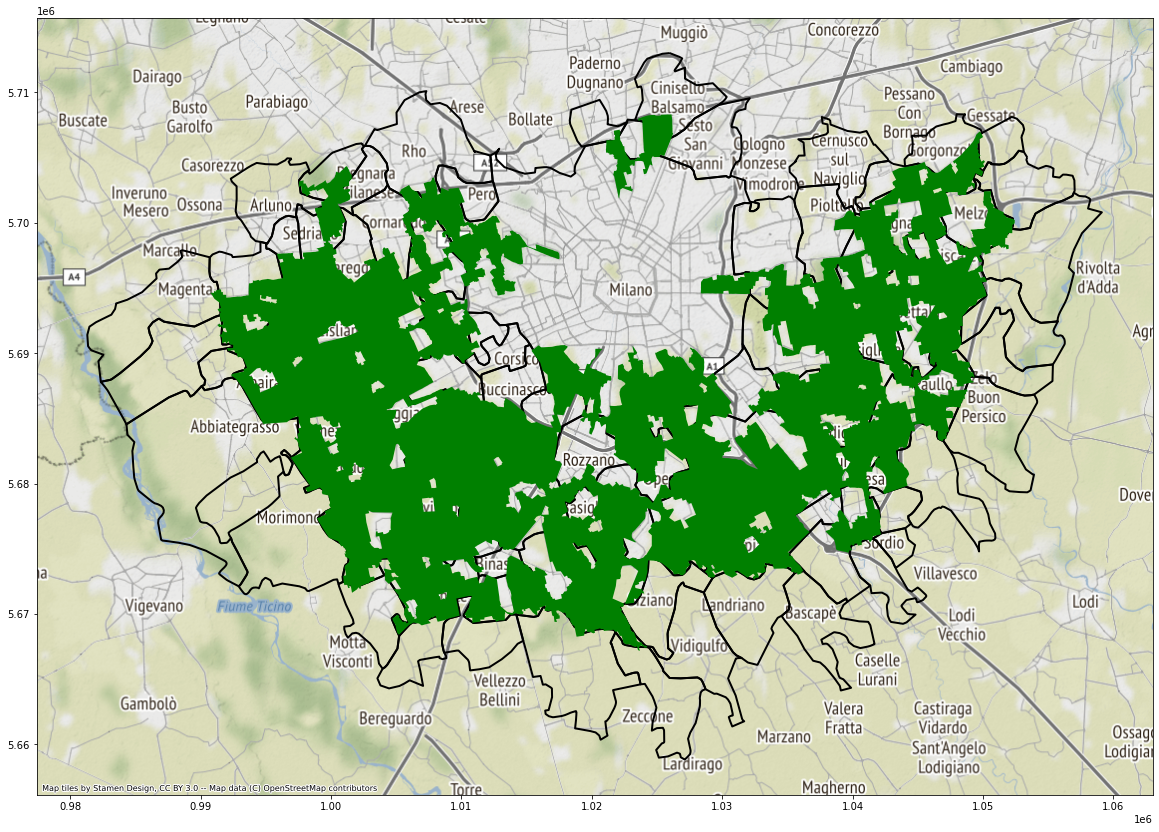

In [ ]:
ax = comuniDentro.to_crs(epsg= 3857).plot(figsize= (20,20), facecolor = "none",alpha=1, edgecolor = "k", linewidth=2)
parchiDiMilano.to_crs(epsg=3857).plot(ax=ax ,facecolor = "Green")
contextily.add_basemap(ax)

### **2**. analogo al primo esercizio ma tracciando sulla mappa solo i quartieri di Milano attraversati da parchi (e non tutta la città)

In [ ]:
quartieriMi = gpd.read_file("/content/drive/MyDrive/ds964_nil_wm")
quartieriMi

In [ ]:
quartieri_attraversati = quartieriMi[quartieriMi.intersects(parchiDiMilano.to_crs(epsg=4326).unary_union)]
quartieri_attraversati

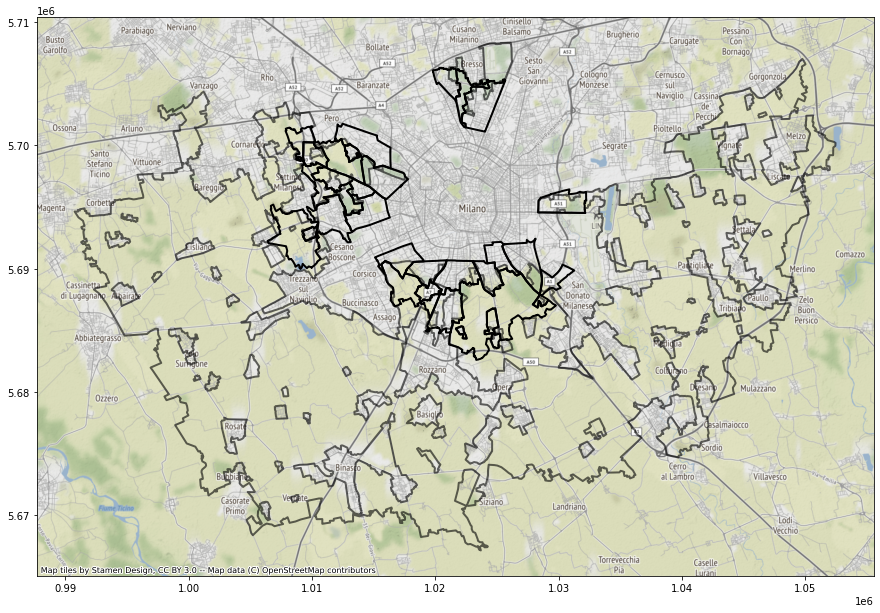

In [ ]:
ax = quartieri_attraversati.to_crs(epsg = 3857).plot(figsize=(15,15), facecolor = "none", edgecolor = "k", linewidth = 2)
parchiDiMilano.to_crs(epsg = 3857).plot(ax = ax, facecolor = "none",linewidth=2, alpha = 0.6, edgecolor = "k" )
contextily.add_basemap(ax=ax)

### **3**  dato il nome di un parco, avere la mappa del parco con i comuni che lo ospitano

In [ ]:
nome_parco = input("inserire il nome del parco: ")
parco = parchi_reg[parchi_reg.NOME == nome_parco]
parco

inserire il nome del parco: Parco Nord Milano


FID  ...                                           geometry
20   21  ...  POLYGON ((516502.662 5041742.040, 516403.321 5...

[1 rows x 11 columns]

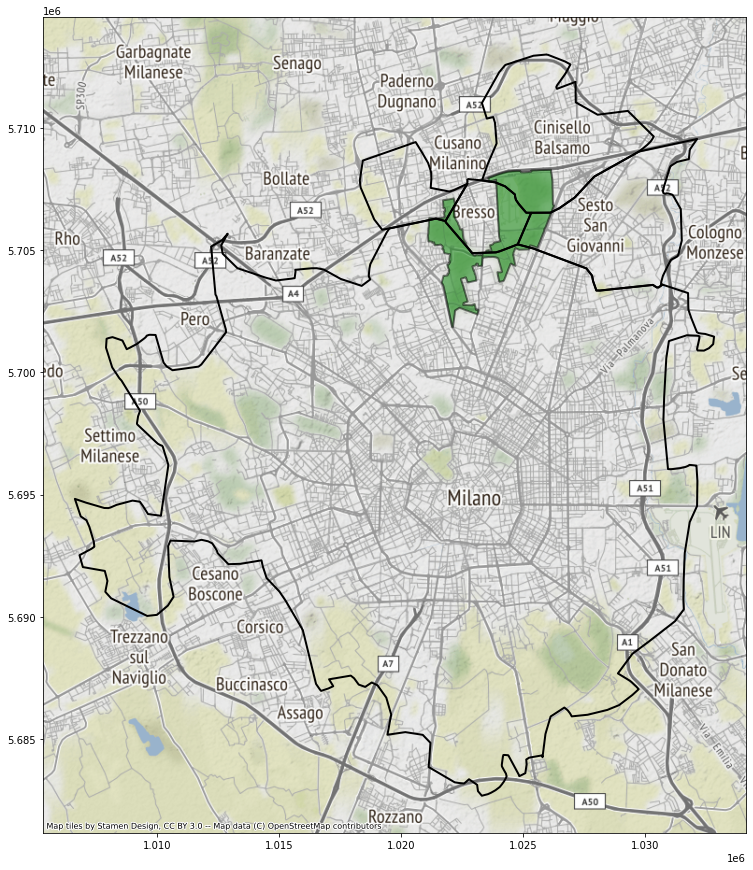

In [ ]:
ax = parco.to_crs(epsg = 3857).plot(figsize=(15,15), facecolor = "Green",alpha= 0.5, edgecolor = "k", linewidth = 2)
comuni_ospitanti = comuni[comuni.intersects(parco.geometry.squeeze())]
comuni_ospitanti.to_crs(epsg = 3857).plot(ax=ax, facecolor = "none", edgecolor = "k", linewidth = 2)
contextily.add_basemap(ax)

### 4. dato il nome di un parco, avere la mappa del parco con le province che attraversa

In [ ]:
nome_parco = input("inserire il nome del parco: ")
parco1 = parchi_reg[parchi_reg.NOME == nome_parco]
parco1

inserire il nome del parco: Parco Nord Milano


FID  ...                                           geometry
20   21  ...  POLYGON ((516502.662 5041742.040, 516403.321 5...

[1 rows x 11 columns]

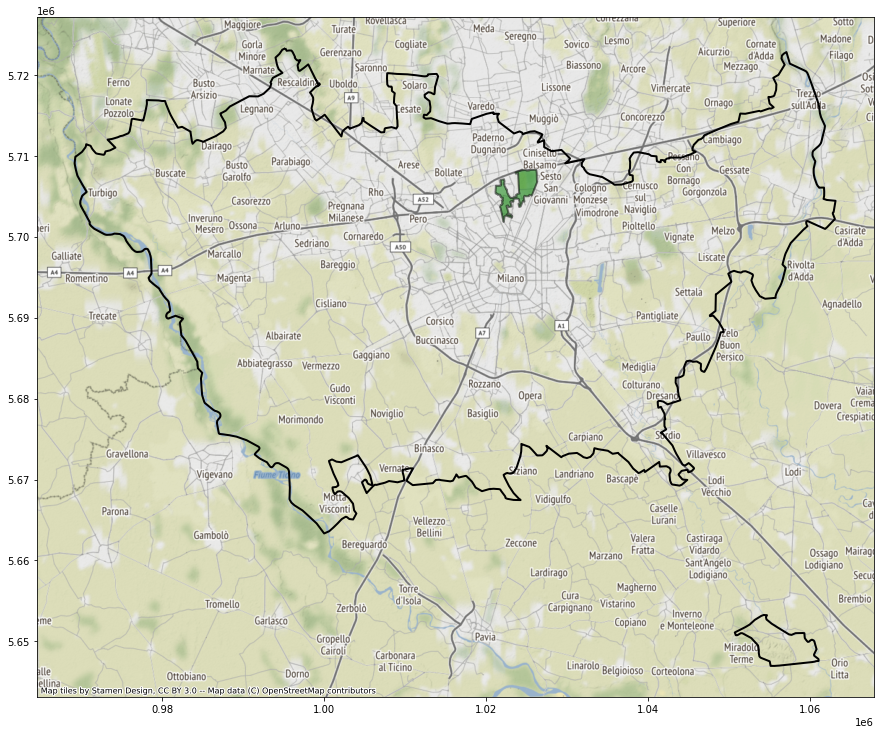

In [ ]:
ax = parco.to_crs(epsg = 3857).plot(figsize=(15,15), facecolor = "Green",alpha= 0.5, edgecolor = "k", linewidth = 2)
provincie_attrave = provincie[provincie.intersects(parco1.geometry.squeeze())]
provincie_attrave.to_crs(epsg = 3857).plot(ax=ax, facecolor = "none", edgecolor = "k", linewidth = 2)
contextily.add_basemap(ax)

### 5. dato un comune, avere i parchi che ospita (elenco e mappa)

In [ ]:
nome_comune = input("inserire il nome del comune: ")
comune = comuni[comuni.COMUNE == nome_comune]
comune

inserire il nome del comune: Milano


COD_RIP  ...                                           geometry
1882        1  ...  POLYGON ((513714.538 5042508.056, 513985.199 5...

[1 rows x 13 columns]

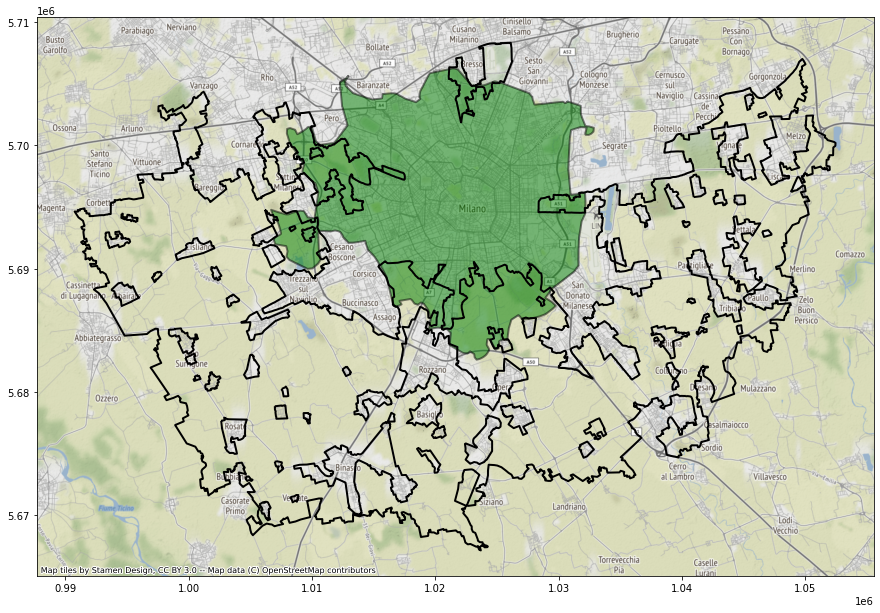

In [ ]:
ax = comune.to_crs(epsg = 3857).plot(figsize=(15,15), facecolor = "Green",alpha= 0.5, edgecolor = "k", linewidth = 2)
parchi_ospitanti = parchi_reg[parchi_reg.intersects(comune.geometry.squeeze())]
parchi_ospitanti.to_crs(epsg = 3857).plot(ax=ax, facecolor = "none", edgecolor = "k", linewidth = 2)
contextily.add_basemap(ax)

In [ ]:
parchi_ospitanti

FID  ...                                           geometry
20   21  ...  POLYGON ((516502.662 5041742.040, 516403.321 5...
21   22  ...  POLYGON ((533691.079 5042919.602, 533758.703 5...

[2 rows x 11 columns]

### 6. dato il nome di una provincia, avere i parchi che ospita (elenco e mappa)

In [ ]:
nome_prov = input("inserire il nome del provincia: ")
provincia = provincie[provincie.DEN_PROV == nome_prov]
provincia

inserire il nome del provincia: Novara


COD_RIP  ...                                           geometry
2        1  ...  POLYGON ((460929.542 5076320.298, 461165.259 5...

[1 rows x 13 columns]

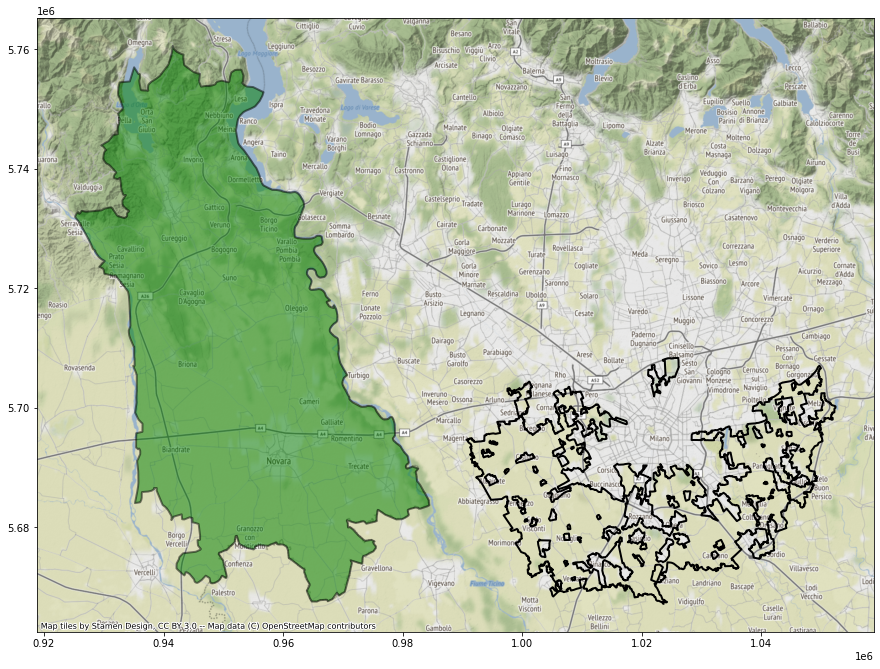

In [ ]:
ax = provincia.to_crs(epsg = 3857).plot(figsize=(15,15), facecolor = "Green",alpha= 0.5, edgecolor = "k", linewidth = 2)
prov_ospitanti = parchi_reg[parchi_reg.intersects(comune.geometry.squeeze())]
prov_ospitanti.to_crs(epsg = 3857).plot(ax=ax, facecolor = "none", edgecolor = "k", linewidth = 2)
contextily.add_basemap(ax)